In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- PREPARE --

In [2]:
dtypes = {'trip_id': str, 
          'arrival_time': str,
          'departure_time': str,
          'stop_id': str, 
          'stop_headsign': str,
          'route_short_name': str
         }

### Read-in stop times

In [3]:
gtfs_stop_times = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/02_pt_extension/google_transit/stop_times.txt"
df_stop_times = pd.read_table(gtfs_stop_times, sep=",", dtype=dtypes)
df_stop_times.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,86.T2.10-1-j21-1.10.R,14:35:00,14:35:00,de:08111:6052:1:2,1,NaN,0,0,0.00
1,86.T2.10-1-j21-1.10.R,14:36:00,14:37:00,de:08111:6221:1:2,2,NaN,0,0,738.21
2,86.T2.10-1-j21-1.10.R,14:38:00,14:38:00,de:08111:6056:1:2,3,NaN,0,0,1425.96


### Read in stops

In [4]:
gtfs_stops = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/02_pt_extension/google_transit/stops.txt"
df_stops = pd.read_table(gtfs_stops, sep=",", dtype=dtypes)
df_stops.head(3)

,stop_id,stop_name,stop_lat,stop_lon
0,de:08111:100:1:1,Stammheim,48.850046,9.156174
1,de:08111:100:2:3,Stammheim,48.849443,9.156022
2,de:08111:100:2:4,Stammheim,48.850217,9.156093


### Read-in routes

In [5]:
gtfs_routes = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/02_pt_extension/google_transit/routes.txt"
df_routes = pd.read_table(gtfs_routes, sep=",", dtype=dtypes)
df_routes.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,10-1-j21-1,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF
1,10-1-j21-10,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF
2,10-1-j21-12,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF


### Read-in trips

In [6]:
gtfs_trips = "C:/Users/david/OneDrive/02_Uni/02_Master/05_Masterarbeit/03_MATSim/01_prep/07_Measures/02_pt_extension/google_transit/trips.txt"
df_trips = pd.read_table(gtfs_trips, sep=",", dtype=dtypes)
df_trips.head(3)

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,block_id
0,10-1-j21-1,T0,1.T0.10-1-j21-1.3.H,10-1-j21-1.3.H,Herrenberg,0,NaN
1,10-1-j21-1,T2,1.T2.10-1-j21-1.12.R,10-1-j21-1.12.R,Kirchheim (T),1,NaN
2,10-1-j21-1,T3,1.T3.10-1-j21-1.8.H,10-1-j21-1.8.H,Herrenberg,0,NaN


### Merge

In [7]:
df = df_stop_times.merge(df_stops, on='stop_id', how='left')
df = df.merge(df_trips, on='trip_id', how='left')
df = df.merge(df_routes, on='route_id', how='left')
df.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,...,shape_id,trip_headsign,direction_id,block_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,86.T2.10-1-j21-1.10.R,14:35:00,14:35:00,de:08111:6052:1:2,1,NaN,0,0,0.00,Schwabstraße,...,10-1-j21-1.10.R,Plochingen,1,NaN,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF
1,86.T2.10-1-j21-1.10.R,14:36:00,14:37:00,de:08111:6221:1:2,2,NaN,0,0,738.21,Feuersee,...,10-1-j21-1.10.R,Plochingen,1,NaN,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF
2,86.T2.10-1-j21-1.10.R,14:38:00,14:38:00,de:08111:6056:1:2,3,NaN,0,0,1425.96,Stadtmitte,...,10-1-j21-1.10.R,Plochingen,1,NaN,NaN,S1,Kirchheim (T) - Plochingen - Stuttgart - Herre...,109,83b23b,FFFFFF


### Make some data column modifications

In [8]:
def convert_time(time_string):
    time = time_string.split(":")
    time = list(map(int, time))
    return time[0]*3600+time[1]*60+time[2]

In [9]:
df['arrival_time'] = df['arrival_time'].apply(convert_time)
df['departure_time'] = df['departure_time'].apply(convert_time)

# -- CALCULATE TRAVEL TIMES --

### Filter Stadtbahn and focus on relevant columns

In [10]:
df_stb = df[df['route_type']==402]

In [11]:
columns_2_keep = ['trip_id',
                  'stop_id',
                  'stop_name',
                  'stop_sequence',
                  'route_short_name',
                  'direction_id',
                  'shape_dist_traveled',
                  'arrival_time',
                  'departure_time']

In [12]:
df_stb = df_stb[columns_2_keep]

In [13]:
df_stb.sort_values(by=['trip_id', 'stop_sequence'],inplace=True)
df_stb.head(3)

,trip_id,stop_id,stop_name,stop_sequence,route_short_name,direction_id,shape_dist_traveled,arrival_time,departure_time
373540,1.T0.20-15-j21-4.2.H,de:08111:100:1:1,Stammheim,1,U15,0,0.00,17220,17220
373541,1.T0.20-15-j21-4.2.H,de:08111:102:1:1,Korntaler Straße,2,U15,0,389.22,17280,17280
373542,1.T0.20-15-j21-4.2.H,de:08111:103:0:1,Heutingsheimer Straße,3,U15,0,893.23,17340,17340


### Convert table with list of stop to table with list of trips between stops

In [14]:
df_tt = df_stb.copy()

In [15]:
df_tt['start_id'] = df_tt.groupby(['trip_id'])['stop_id'].shift(1)
df_tt['start_name'] = df_tt.groupby(['trip_id'])['stop_name'].shift(1)
df_tt['start_dep_time'] = df_tt.groupby(['trip_id'])['departure_time'].shift(1)
df_tt['dist'] = df_tt['shape_dist_traveled'].diff()

df_tt.rename(columns={'stop_id':'end_id', 'stop_name':'end_name', 'arrival_time':'end_arr_time'}, inplace=True)

df_tt = df_tt[df_tt['start_id'].notna()]

new_order = ['trip_id', 'route_short_name', 'start_id', 'start_name', 'end_id', 'end_name', 'dist', 'start_dep_time', 'end_arr_time']
df_tt = df_tt[new_order]

df_tt.head(3)

,trip_id,route_short_name,start_id,start_name,end_id,end_name,dist,start_dep_time,end_arr_time
373541,1.T0.20-15-j21-4.2.H,U15,de:08111:100:1:1,Stammheim,de:08111:102:1:1,Korntaler Straße,389.22,17220.0,17280
373542,1.T0.20-15-j21-4.2.H,U15,de:08111:102:1:1,Korntaler Straße,de:08111:103:0:1,Heutingsheimer Straße,504.01,17280.0,17340
373543,1.T0.20-15-j21-4.2.H,U15,de:08111:103:0:1,Heutingsheimer Straße,de:08111:104:0:1,Wimpfener Straße,503.58,17340.0,17400


 ### Calculate time of travel and speed

In [16]:
df_tt['time_of_travel'] = df_tt['end_arr_time'] - df_tt['start_dep_time']
df_tt['time_of_travel_2'] = df_tt['time_of_travel'].apply(lambda x: x if x > 0 else 30.)
df_tt['speed_m_per_s'] = df_tt['dist'] / df_tt['time_of_travel_2']
df_tt['speed_km_per_h'] = df_tt['speed_m_per_s'] * 3.6
df_tt.head(3)

,trip_id,route_short_name,start_id,start_name,end_id,end_name,dist,start_dep_time,end_arr_time,time_of_travel,time_of_travel_2,speed_m_per_s,speed_km_per_h
373541,1.T0.20-15-j21-4.2.H,U15,de:08111:100:1:1,Stammheim,de:08111:102:1:1,Korntaler Straße,389.22,17220.0,17280,60.0,60.0,6.487000,23.3532
373542,1.T0.20-15-j21-4.2.H,U15,de:08111:102:1:1,Korntaler Straße,de:08111:103:0:1,Heutingsheimer Straße,504.01,17280.0,17340,60.0,60.0,8.400167,30.2406
373543,1.T0.20-15-j21-4.2.H,U15,de:08111:103:0:1,Heutingsheimer Straße,de:08111:104:0:1,Wimpfener Straße,503.58,17340.0,17400,60.0,60.0,8.393000,30.2148


# -- EVALUATE RESULTS --

 ### Per Line

In [17]:
df_tt_per_line = df_tt.groupby(['route_short_name']).agg({'dist':[np.mean, np.sum], 'time_of_travel':np.sum}).reset_index()
df_tt_per_line.columns = ['_'.join(col).strip() for col in df_tt_per_line.columns.values]
df_tt_per_line.rename(columns={'route_short_name_':'route_short_name'}, inplace=True)

In [18]:
df_tt_per_line['speed_m_per_s'] = df_tt_per_line['dist_sum'] / df_tt_per_line['time_of_travel_sum']
df_tt_per_line['speed_km_per_h'] = df_tt_per_line['speed_m_per_s'] * 3.6
df_tt_per_line

,route_short_name,dist_mean,dist_sum,time_of_travel_sum,speed_m_per_s,speed_km_per_h
0,U1,575.405208,1.084869e+07,1195860.0,9.071873,32.658742
1,U12,694.386510,1.459531e+07,1600140.0,9.121271,32.836574
2,U13,612.862384,8.114911e+06,918960.0,8.830538,31.789935
3,U14,541.213199,7.752338e+06,828840.0,9.353238,33.671657
4,U15,563.023339,2.121528e+07,2560920.0,8.284243,29.823273
5,U16,584.535529,2.048797e+06,219240.0,9.344996,33.641987
6,U19,650.828564,2.465339e+06,276720.0,8.909145,32.072922
7,U2,523.646350,8.677867e+06,971460.0,8.932810,32.158115
8,U29,498.472713,4.692622e+06,546780.0,8.582286,30.896228
9,U3,783.285725,4.750628e+06,462000.0,10.282744,37.017880


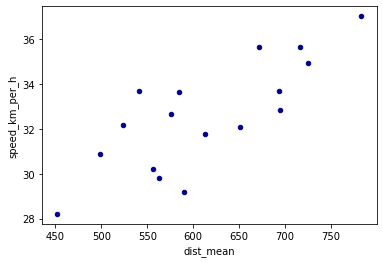

In [19]:
ax = df_tt_per_line.plot.scatter(x='dist_mean',
                                 y='speed_km_per_h',
                                 c='DarkBlue')

 ### In Total

In [20]:
(df_tt_per_line['dist_sum'].sum()/df_tt_per_line['time_of_travel_sum'].sum())*3.6

32.55744959178156

 ### Clustered by distance between stations

In [21]:
df_tt['dist'].min()

180.18000000000006

In [22]:
df_tt['dist'].max()

3035.9299999999994

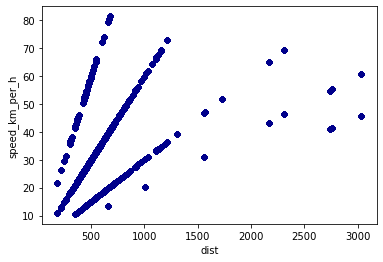

In [23]:
ax = df_tt.plot.scatter(x='dist',
                        y='speed_km_per_h',
                        c='DarkBlue')

 ### Clustered by trip departure